In [2]:
from matplotlib import pyplot as plt

from pyloki.config import PulsarSearchConfig
from pyloki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig

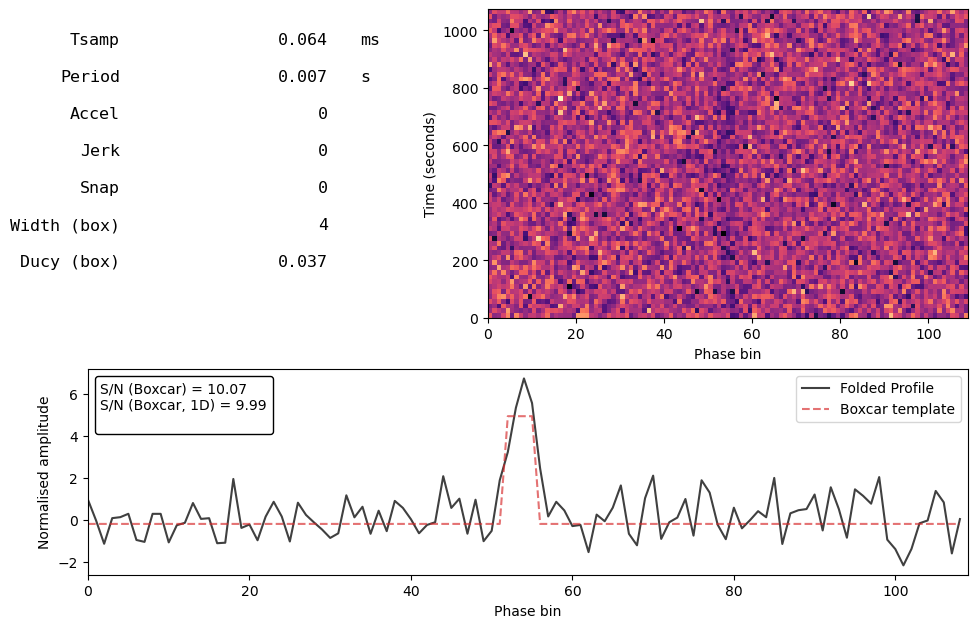

In [3]:
pulsar_period = 0.007  # (s)
dt = 64e-6
nsamps = 2**24
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, snr=10, ducy=0.05, nsamps=nsamps, ds=1)
tim_data = cfg.generate(shape="gaussian")
fig = tim_data.plot_fold(cfg.freq, cfg.fold_bins)
plt.show()

In [4]:
tol_bins = 1  # cfg.tol_bins
fold_bins = 64
param_limits = [(1 / 0.0075, 1 / 0.0065)]
bseg_brute = cfg.nsamps // 16384
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=param_limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, use_fft_shifts=False)
dyp, pgram = ffa_search(tim_data, search_cfg, quiet=True, show_progress=True)

Output()

In [5]:
print(pgram.get_indices_summary(true_values={"freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (654471,)
Best param indices: (np.int64(654470), np.int64(1))
Best S/N: 9.91
Best Period: 0.007000000381987604
Best freq: 142.8571350614779
Best width: 2


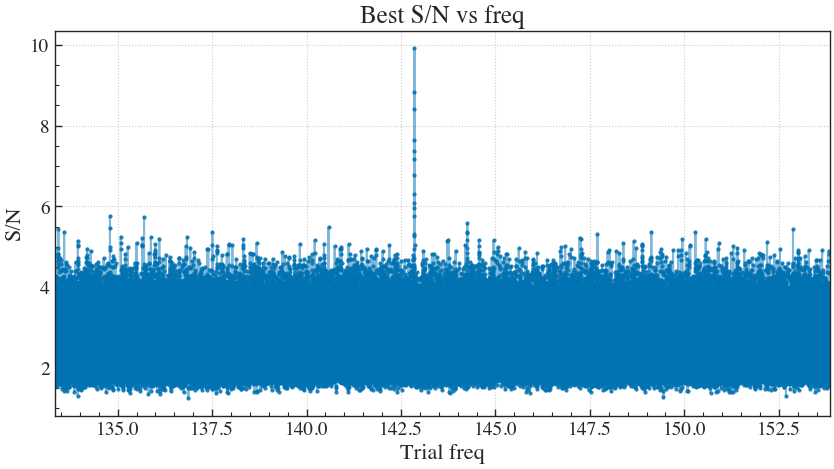

In [6]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

### FFT-SHIFT Search

In [7]:
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=param_limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, use_fft_shifts=True)
dyp, pgram = ffa_search(tim_data, search_cfg, quiet=True, show_progress=True)

Output()

In [8]:
print(pgram.get_indices_summary(true_values={"freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (654471,)
Best param indices: (np.int64(654471), np.int64(1))
Best S/N: 10.17
Best Period: 0.006999999668944111
Best freq: 142.85714961338581
Best width: 2


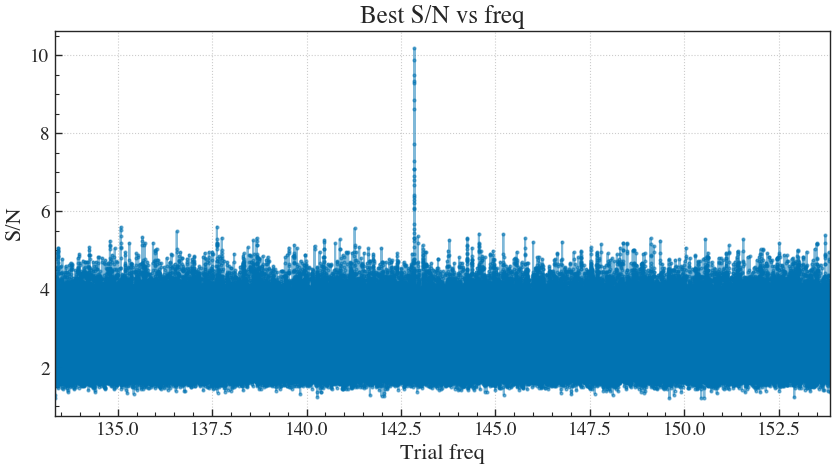

In [9]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()